In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [34]:
file_path = "data\predictions_stock_tweets_filtered_TSLA.csv"
encoding = "ISO-8859-1"

df = pd.read_csv(file_path, encoding=encoding)

In [35]:
df

,text,date,stock,Predicted_Labels,Probability_Class_0,Probability_Class_1
0,Mainstream media has done an amazing job at br...,2022-09-29 23:41:16+00:00,TSLA,1,0.002322,0.997678
1,Tesla delivery estimates are at around 364k fr...,2022-09-29 23:24:43+00:00,TSLA,1,0.012586,0.987414
2,3/ Even if I include 63.0M unvested RSUs as of...,2022-09-29 23:18:08+00:00,TSLA,1,0.001468,0.998532
3,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,2022-09-29 22:40:07+00:00,TSLA,1,0.003894,0.996106
4,"@RealDanODowd @Tesla Stop trying to kill kids,...",2022-09-29 22:27:05+00:00,TSLA,0,0.977284,0.022716
...,...,...,...,...,...,...
37417,Playing in the dirt and #chasingsunsets\n@tesl...,2021-09-30 02:52:38+00:00,TSLA,1,0.002532,0.997468
37418,I agree with @freshjiva that $TSLA âs EV bus...,2021-09-30 02:40:26+00:00,TSLA,0,0.995698,0.004302
37419,Hold. On. Tight. $TSLA,2021-09-30 01:59:02+00:00,TSLA,1,0.001618,0.998382
37420,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,2021-09-30 01:38:26+00:00,TSLA,0,0.995455,0.004545


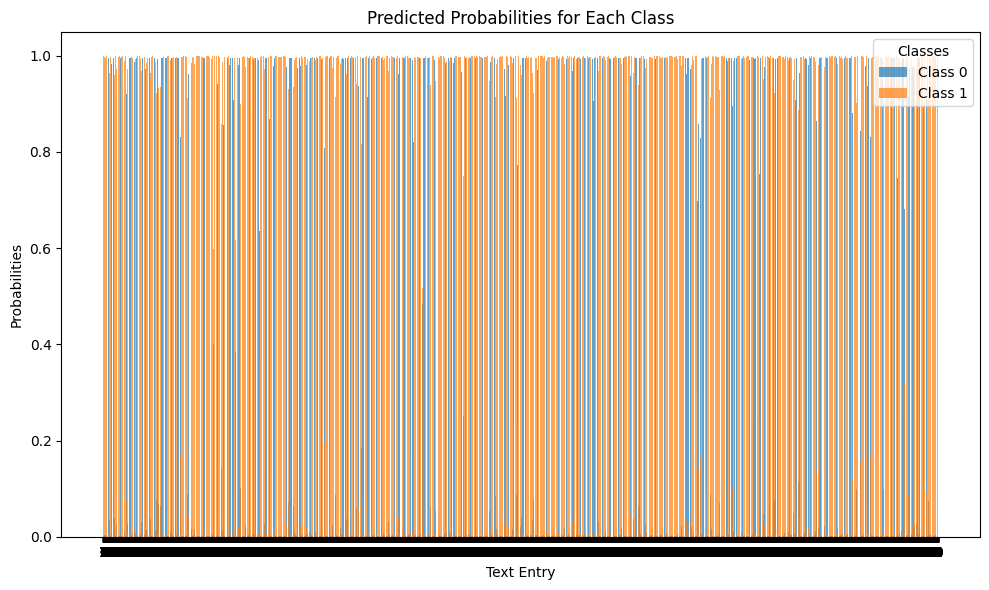

In [36]:
# Create a bar chart for predicted labels and their probabilities
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Probability_Class_0'], label='Class 0', alpha=0.7)
plt.bar(df.index, df['Probability_Class_1'], label='Class 1', alpha=0.7)
plt.xlabel('Text Entry')
plt.ylabel('Probabilities')
plt.title('Predicted Probabilities for Each Class')
plt.xticks(df.index, df['Predicted_Labels'])
plt.legend(loc='upper right', title='Classes')
plt.tight_layout()

plt.show()

C:\Users\Steven\AppData\Local\Temp\ipykernel_15788\4257415425.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Steven\anaconda3\envs\stock\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


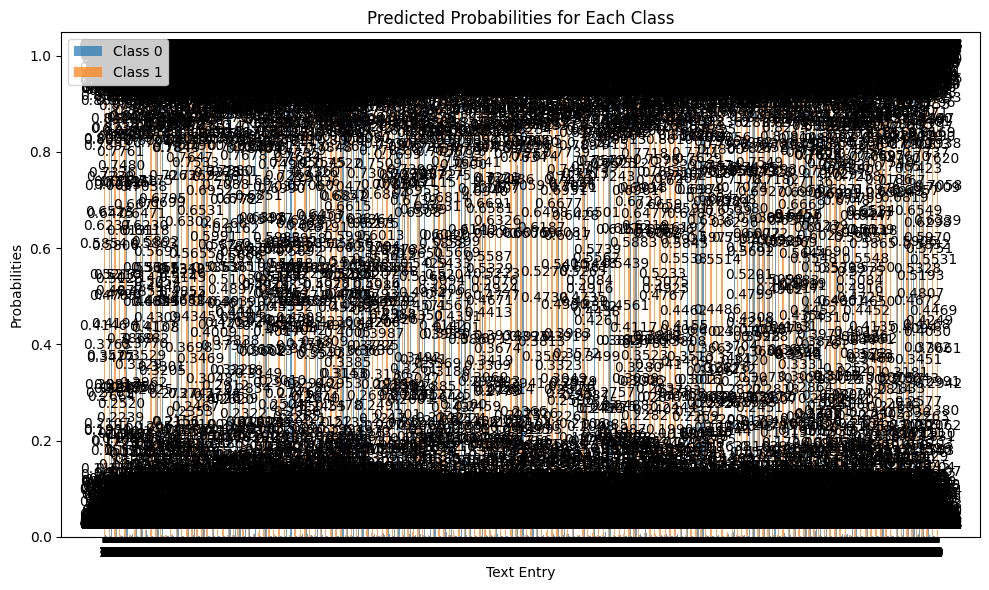

In [37]:
# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(df))
bar_width = 0.35

bar1 = ax.bar(index, df['Probability_Class_0'], bar_width, label='Class 0', alpha=0.7)
bar2 = ax.bar(index + bar_width, df['Probability_Class_1'], bar_width, label='Class 1', alpha=0.7)

ax.set_xlabel('Text Entry')
ax.set_ylabel('Probabilities')
ax.set_title('Predicted Probabilities for Each Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Predicted_Labels'])
ax.legend()

# Add labels to the bars
for rect1, rect2 in zip(bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    ax.annotate(f'{height1:.4f}', xy=(rect1.get_x() + rect1.get_width() / 2, height1), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')
    ax.annotate(f'{height2:.4f}', xy=(rect2.get_x() + rect2.get_width() / 2, height2), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()
